In [232]:
import sys
sys.path.append(r'C:/Users/dskapinakis/Documents/web_scraping')
import pandas as pd
import scraper as scr #import helper functions from scraper.py for extracting and loading data 
from transform import Transform #import helper functions from transform.py for transforming the data to a final dataframe
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# click url before scraping for bot detection and check how many pages to scrape 
scr.base_url('rent', 're_residence', scr.geo_ids['gyzi'])  #extract residential properties for rent in Gyzi

'https://www.xe.gr/en/property/results?transaction_name=rent&item_type=re_residence&sorting=create_desc&geo_place_ids%5B%5D=ChIJXcJaXLOioRQRM1r_V3pg178'

In [4]:
# scrape data
data = scr.batch_scraping('gyzi', 'rent', 're_residence', 10)

# Append batches in a final dataframe
concat_data = pd.concat([data[i] for i in list(data.keys())], axis=0)

Scraping data for gyzi...  (details: rent, re_residence)
Batch 0:
Number of properties collected:  68
Batch 1:
Number of properties collected:  68
Batch 2:
Number of properties collected:  68
Batch 3:
Number of properties collected:  68
Batch 4:
Number of properties collected:  68


In [14]:
data_transformed = Transform(concat_data)
data_transformed

,Style,Furnished,Suitable for professional use,Floor,Location,Heating Method,Bedrooms,Fireplace,Short term rental,Bathrooms,...,Energy Class,publication_Date,Renovation year,Tents,Night electricity tariff,Storage room,Garden,No maintenance fees,Heating,Heating System
0,Not specified,0.0,0.0,Elevated Ground Floor,Athens (Pedion tou Areos),Not specified,2.0,0.0,0.0,1.0,...,Pending,2024-08-11,Not specified,0.0,0.0,0,0,0.0,1,Not specified
1,Not specified,1.0,0.0,2nd,Athens (Lycabettus),Not specified,Not specified,0.0,0.0,1.0,...,Η,2024-08-13,2024.0,0.0,0.0,0,0,0.0,1,Autonomous heating centrally installed
2,Not specified,1.0,0.0,5th,Athens (Ippokratous),Oil,Not specified,0.0,1.0,1.0,...,Pending,2024-08-13,Not specified,1.0,0.0,0,0,0.0,1,Central heating
3,Not specified,1.0,0.0,3rd,Athens (Lycabettus),Electricity,2.0,0.0,0.0,1.0,...,Ε,2024-08-10,2023.0,1.0,0.0,0,0,0.0,1,Autonomous heating centrally installed
4,Not specified,1.0,1.0,Ground floor,Athens (Ippokratous),Natural gas,1.0,0.0,0.0,1.0,...,Pending,2024-08-14,2024.0,0.0,0.0,0,0,0.0,1,Central heating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Not specified,1.0,0.0,1st,Athens (Kountouriotika),Not specified,1.0,0.0,0.0,1.0,...,D,2024-07-28,2020.0,0.0,0.0,0,0,0.0,1,Central heating
64,Not specified,0.0,1.0,3rd,Athens (Exarcheia),Not specified,3.0,0.0,0.0,1.0,...,Pending,2024-07-26,2024.0,0.0,0.0,0,0,0.0,1,Not specified
65,Not specified,0.0,1.0,5th,Athens (Pedion tou Areos),Not specified,2.0,0.0,0.0,Not specified,...,Α+,2024-07-29,2024.0,1.0,0.0,Storage room,0,0.0,1,Central heating
66,Not specified,0.0,0.0,4th,Athens (Neapoli),Not specified,2.0,0.0,0.0,2.0,...,D,2024-07-29,Not specified,1.0,0.0,Storage room,0,0.0,1,Not specified


## EDA

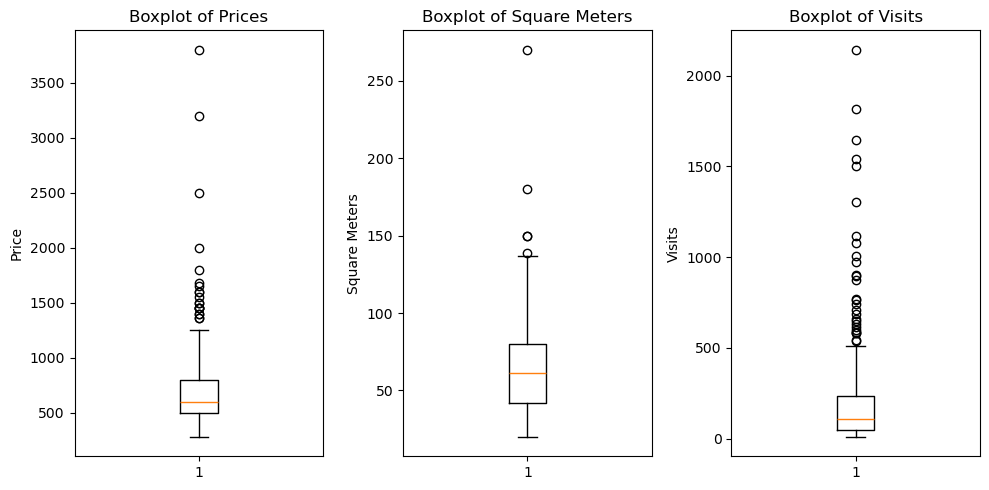

In [66]:
# price, s.m., visits data
prices = data_transformed['Price']
square_meters = data_transformed['Square Meters']
visits = data_transformed['visits']

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Boxplot for Price
axs[0].boxplot(prices)
axs[0].set_title('Boxplot of Prices')
axs[0].set_ylabel('Price')

# Boxplot for Square Meters
axs[1].boxplot(square_meters)
axs[1].set_title('Boxplot of Square Meters')
axs[1].set_ylabel('Square Meters')

# Boxplot for Visits
axs[2].boxplot(visits)
axs[2].set_title('Boxplot of Visits')
axs[2].set_ylabel('Visits')

plt.tight_layout()
plt.show()

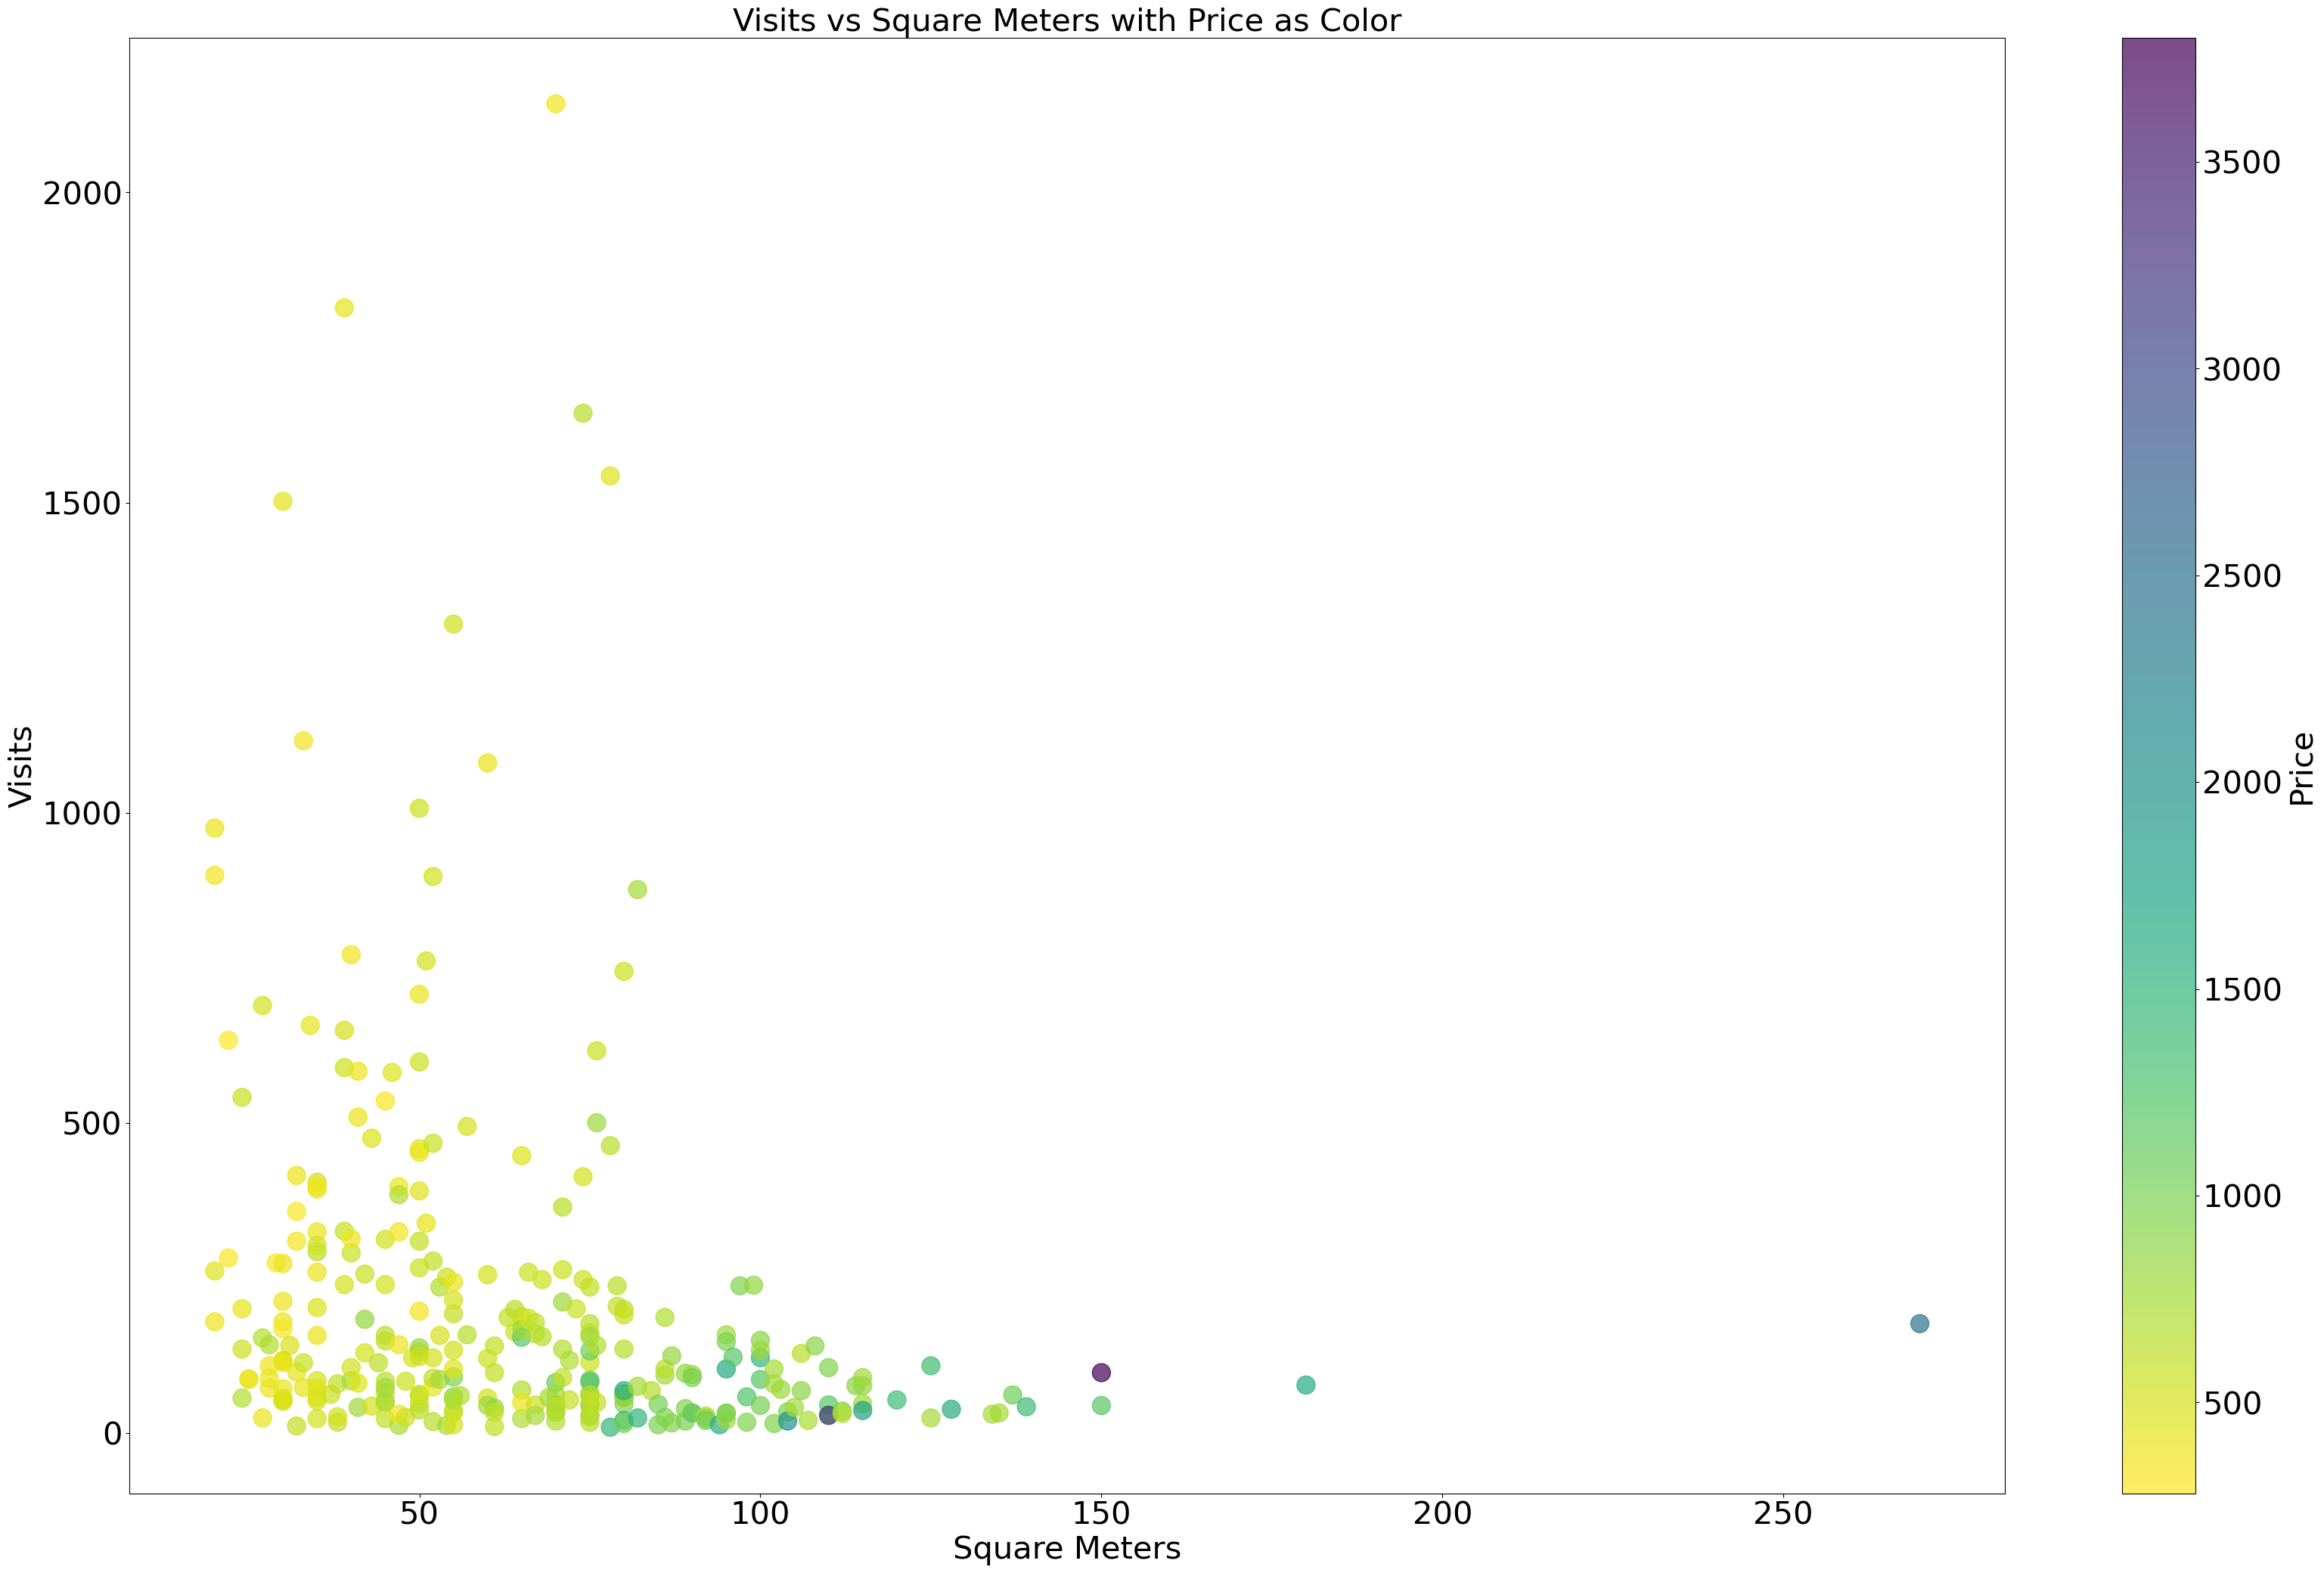

In [228]:
# Sort the DataFrame based on square meters
df_sorted = data_transformed.sort_values(by='Square Meters')

# Extracting sorted data from DataFrame
prices_sorted = df_sorted['Price']
locations_sorted = df_sorted['Location']
square_meters_sorted = df_sorted['Square Meters']
visits_sorted = df_sorted['visits']  

# Creating scatter plot
plt.figure(figsize=(40, 25))
scatter = plt.scatter(square_meters_sorted, visits_sorted, c=prices_sorted, cmap='viridis_r', alpha=0.7, s=300)

# Adding color bar for the visits
cbar = plt.colorbar(scatter)
cbar.set_label('Price', fontsize = 30)
cbar.ax.tick_params(labelsize=30) 

# Adding labels and title
plt.xlabel('Square Meters', fontsize = 30)
plt.ylabel('Visits', fontsize = 30)
plt.title('Visits vs Square Meters with Price as Color', fontsize = 30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

## Regression Analysis

This is a naive approach, since the assumptions of regression should have been checked beforehand. Also the categorical features have not yet been added as predictors, something that could increase R-squared.  

In [268]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 67
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Style                          305 non-null    object        
 1   Furnished                      305 non-null    float64       
 2   Suitable for professional use  305 non-null    float64       
 3   Floor                          305 non-null    object        
 4   Location                       305 non-null    object        
 5   Heating Method                 305 non-null    object        
 6   Bedrooms                       305 non-null    object        
 7   Fireplace                      305 non-null    float64       
 8   Short term rental              305 non-null    float64       
 9   Bathrooms                      305 non-null    object        
 10  Parking                        305 non-null    object        
 11  Solar water heater       

In [269]:
cat_cols = [col for col in data_transformed.columns if data_transformed[col].dtype == 'object'] #categorical columns
num_cols = [col for col in data_transformed.columns if data_transformed[col].dtype != 'object'] #numerical columns

In [270]:
# Fit a naive linear regression model, with numerical features as predictors for simplicity 
# and Price as the target variable. In this way we could estimate what predictor drives most the Price
# based on p-values

X = data_transformed[num_cols].drop(columns = ['visits','saves','Price','publication_Date'])
X = sm.add_constant(X)  # Adds a constant term (intercept) to the model

# Dependent variable
y = data_transformed['Price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     27.39
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           7.03e-47
Time:                        23:52:36   Log-Likelihood:                -2113.1
No. Observations:                 305   AIC:                             4258.
Df Residuals:                     289   BIC:                             4318.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [271]:
# Backward feature elimination algorithm to improve R-squared 

def backward_elimination(X, y, significance_level=0.05):
    num_vars_no_const = len(X.columns) - 1
    for i in range(num_vars_no_const):
        # Fit the model with the current set of variables
        model = sm.OLS(y, X).fit()
        # Get the highest p-value of the variables
        if model.pvalues.idxmax()!= 'const':
            max_p_value = model.pvalues.max()
        else:
            pvalues_without_max = model.pvalues.drop(model.pvalues.idxmax())
            max_p_value = pvalues_without_max.max()

        # If the highest p-value is greater than the significance level, remove that variable
        # Do not remove the constant term even if it has the highest p-value
        if max_p_value > significance_level:
            excluded_feature = model.pvalues[model.pvalues==max_p_value].index[0]
            print(f"Dropping '{excluded_feature}' with p-value {max_p_value}")
            X = X.drop(columns=[excluded_feature])   
        else:
            break
    return X, model

# Perform backward elimination
X_opt, model_opt = backward_elimination(X, y)

# Print the summary of the final model
print(model_opt.summary())


Dropping 'Suitable for professional use' with p-value 0.9204087138619175
Dropping 'No maintenance fees' with p-value 0.8434503265069099
Dropping 'No elevator' with p-value 0.5324528590787376
Dropping 'Aluminium frames' with p-value 0.385828176236902
Dropping 'Heating' with p-value 0.2532913964041605
Dropping 'Solar water heater' with p-value 0.22282839338891589
Dropping 'Night electricity tariff' with p-value 0.19179748584652015
Dropping 'Fireplace' with p-value 0.3044049312720648
Dropping 'Security door' with p-value 0.0770257888192274
Dropping 'Short term rental' with p-value 0.07803514530968934
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     78.78
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           1.62e-52
